In [20]:
import tensorflow as tf
import os
from tensorflow import keras
import numpy as np
import shutil
import glob
from PIL import Image 
import matplotlib.pyplot as plt

In [21]:
os.getcwd()

'C:\\Users\\mta-aldiyar\\Desktop\\emotion R'

# Data Preparation

In [22]:
data_path = r"ASL_data\\asl_alphabet_train"
valid_data = r"ASL_data\\asl_alphabet_valid"
labels_encoder = {"Loser":1, "Punch":2, "Super":3, "Victory":4}
os.makedirs(valid_data, exist_ok=True)
for label in labels_encoder.keys():
    os.makedirs(os.path.join(valid_data, label), exist_ok=True)
for dr in os.listdir(data_path):
    if dr == 'L':
        os.rename(os.path.join(data_path, dr), os.path.join(data_path,"Loser"))
    elif dr == 'A':
        os.rename(os.path.join(data_path, dr), os.path.join(data_path,"Punch"))
    elif dr == 'F':
        os.rename(os.path.join(data_path, dr), os.path.join(data_path,"Super"))
    elif dr == 'V':
        os.rename(os.path.join(data_path, dr), os.path.join(data_path,"Victory"))
    else:
        shutil.rmtree(os.path.join(data_path, dr))

In [23]:
np.array(image_ps)[[0, 1, 2]]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
for label in labels_encoder.keys():
    image_ps = glob.glob(os.path.join(data_path, label)+ '\*.jpg')
    valid_path = np.array(image_ps)[np.array(np.linspace(0, 3000-1, 600)).astype("int32")]
    for im in valid_path:
        shutil.copy(im, os.path.join(valid_data, label))
        os.remove(im)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [8]:
image_ps = glob.glob(os.path.join(data_path, list(labels_encoder.keys())[0])+ '\*.jpg')
len(image_ps)

0

In [9]:
Image.open(image_ps[0])

IndexError: list index out of range

In [10]:
Image.open(image_ps[0])

IndexError: list index out of range

In [11]:
image_ps = glob.glob(os.path.join(data_path, list(labels_encoder.keys())[1])+ '\*.jpg')
len(image_ps)

0

In [12]:
Image.open(image_ps[0])

IndexError: list index out of range

In [13]:
Image.open(image_ps[500])

IndexError: list index out of range

In [14]:
image_ps = glob.glob(os.path.join(data_path, list(labels_encoder.keys())[2])+ '\*.jpg')
len(image_ps)

0

In [15]:
Image.open(image_ps[0])

IndexError: list index out of range

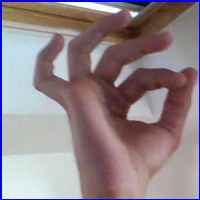

In [60]:
Image.open(image_ps[500])

In [61]:
image_ps = glob.glob(os.path.join(data_path, list(labels_encoder.keys())[3])+ '\*.jpg')
len(image_ps)

2400

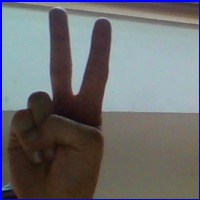

In [62]:
Image.open(image_ps[0])

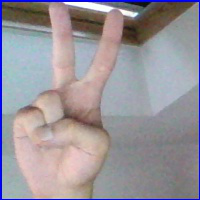

In [63]:
Image.open(image_ps[500])

In [67]:
Image.open(image_ps[500]).size

(200, 200)

In [115]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

num_classes = 4

Img_height = 200
Img_width = 200

batch_size = 128

train_dir = data_path
validation_dir = valid_data

In [116]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                        target_size=(Img_height, Img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(Img_height, Img_width),
                                                             batch_size=batch_size,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 9600 images belonging to 4 classes.
Found 2400 images belonging to 4 classes.


In [127]:
resnet50_model = ResNet50V2(input_shape=(Img_height, Img_width, 3), 
                          include_top=False)

In [128]:
resnet50_model.layers[-1]

In [129]:
for layers in resnet50_model.layers:
    layers.trainable = False

In [130]:
for layers in resnet50_model.layers:
    print(layers.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [131]:
len(resnet50_model.layers)

190

In [80]:
for layers in resnet50_model.layers[-30:]:
    layers.trainable = True

In [132]:
input_layer = resnet50_model.output




# Flatten
flatten = keras.layers.GlobalAveragePooling2D(data_format='channels_last',name='Flatten')(input_layer)

# Fully Connected layer-1
FC1 = Dense(units=30, activation='relu', 
            kernel_initializer=keras.initializers.glorot_normal(seed=32), 
            name='FC1')(flatten)

# Fully Connected layer-2
FC2 = Dense(units=30, activation='relu', 
            kernel_initializer=keras.initializers.glorot_normal(seed=33),
            name='FC2')(FC1)

# Output layer
Out = Dense(units=num_classes, activation='softmax', 
            kernel_initializer=keras.initializers.glorot_normal(seed=3), 
            name='Output')(FC2)

model1 = Model(inputs=resnet50_model.input,outputs=Out)

In [133]:
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 50, 50, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 50, 50, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 50, 50, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 25, 25, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 25, 25, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 13, 13, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 15, 15, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 13, 13, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 13, 13, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 15, 15, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [134]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

base = "Final_ASL_model/"
os.makedirs(base, exist_ok=True)
checkpoint = ModelCheckpoint(os.path.join(base,"emotion_hand.h5"), monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='auto', save_freq='epoch')

reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.4, patience=15,
                           min_lr=0.00001, verbose = 1)

logdir = "logs"

tb = TensorBoard(logdir)

In [135]:
train_samples = 9600
validation_samples = 2400

epochs = 50

batch_size = 128

model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy']
              )
              
history = model1.fit(train_generator,
           steps_per_epoch = train_samples//batch_size,
           epochs = epochs,
           callbacks = [checkpoint, reduce, tb],
           validation_data = validation_generator,
           validation_steps = validation_samples//batch_size)

Epoch 1/50
75/75 [==============================] - ETA: 0s - loss: 0.5855 - accuracy: 0.7744
Epoch 1: val_accuracy improved from -inf to 0.98568, saving model to Final_ASL_model\emotion_hand.h5
75/75 [==============================] - 724s 10s/step - loss: 0.5855 - accuracy: 0.7744 - val_loss: 0.0666 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 2/50
75/75 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.9008
Epoch 2: val_accuracy did not improve from 0.98568
75/75 [==============================] - 717s 10s/step - loss: 0.2778 - accuracy: 0.9008 - val_loss: 0.0554 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 3/50
75/75 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9208
Epoch 3: val_accuracy did not improve from 0.98568
75/75 [==============================] - 711s 9s/step - loss: 0.2148 - accuracy: 0.9208 - val_loss: 0.0499 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 4/50
75/75 [==============================] - ETA: 0s - loss: 0.2057 - accurac

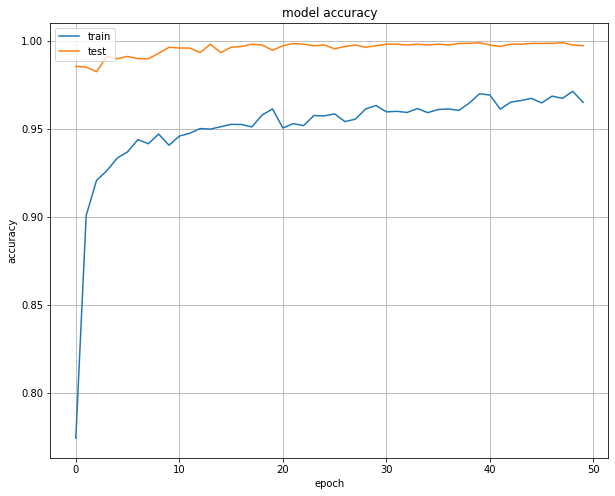

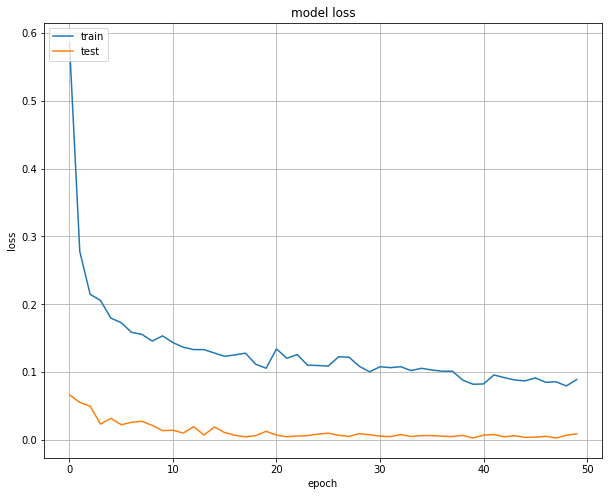

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid("on")
plt.show()
# summarize history for loss
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.grid("on")
plt.show()


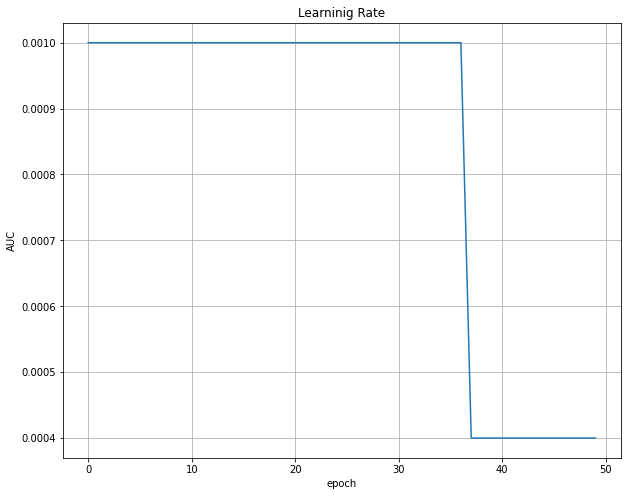

In [137]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['lr'])
#plt.plot(history.history['val_auc'])
#plt.legend(['train', 'test'], loc='upper left')
#plt.plot(history.history['val_loss'])
plt.title('Learninig Rate')
plt.ylabel('AUC')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.grid("on")
plt.show()

In [138]:
model1.evaluate(validation_generator)

19/19 [==============================] - 152s 8s/step - loss: 0.0087 - accuracy: 0.9975


[0.008650570176541805, 0.9975000023841858]

In [139]:
model1.load_weights("Final_ASL_model/emotion_hand.h5")

In [140]:
model1.evaluate(validation_generator)

19/19 [==============================] - 135s 7s/step - loss: 0.0029 - accuracy: 0.9992


[0.0029045979026705027, 0.9991666674613953]